In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('imdb_top_1000.csv')

# Hapus " min" dari Runtime → ubah ke int
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)

# Bersihkan kolom Gross (hapus $ dan koma)
df['Gross'] = df['Gross'].str.replace(',', '').str.replace('$', '')
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

<Axes: title={'center': '10 Genre Terpopuler'}, xlabel='Genre'>

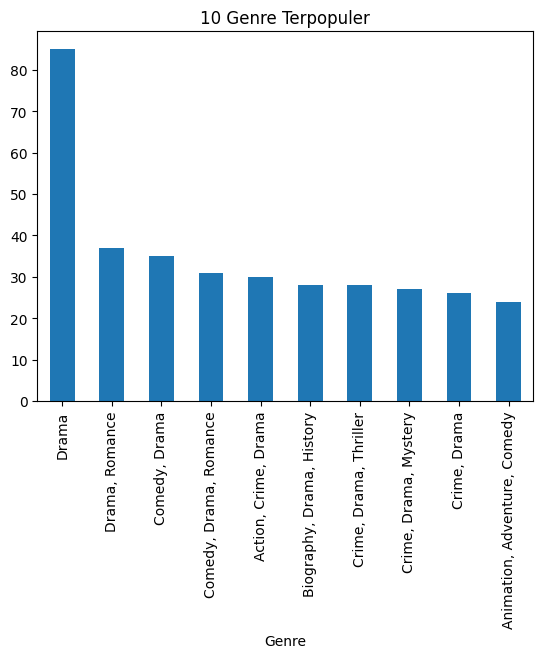

In [ ]:
df['Genre'].value_counts().head(10).plot(kind='bar', title='10 Genre Terpopuler')


Text(0.5, 1.0, 'Meta Score vs IMDb Rating')

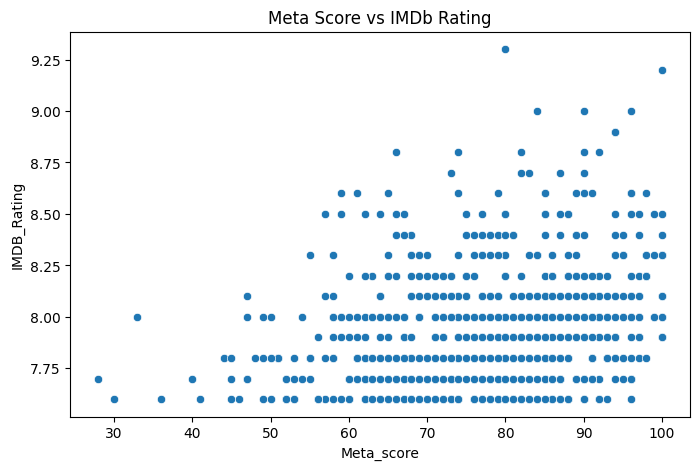

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Meta_score', y='IMDB_Rating', data=df)
plt.title('Meta Score vs IMDb Rating')

<Axes: title={'center': 'Rata-Rata IMDb Rating per Tahun'}, xlabel='Released_Year'>

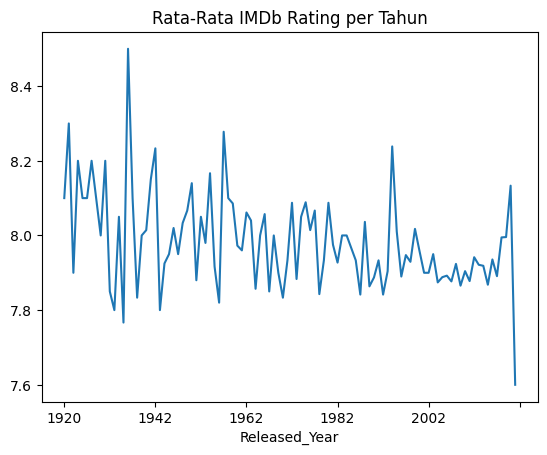

In [33]:
df.groupby('Released_Year')['IMDB_Rating'].mean().plot(kind='line', title='Rata-Rata IMDb Rating per Tahun')

<Axes: title={'center': 'Top 10 Sutradara Terbanyak'}, xlabel='Director'>

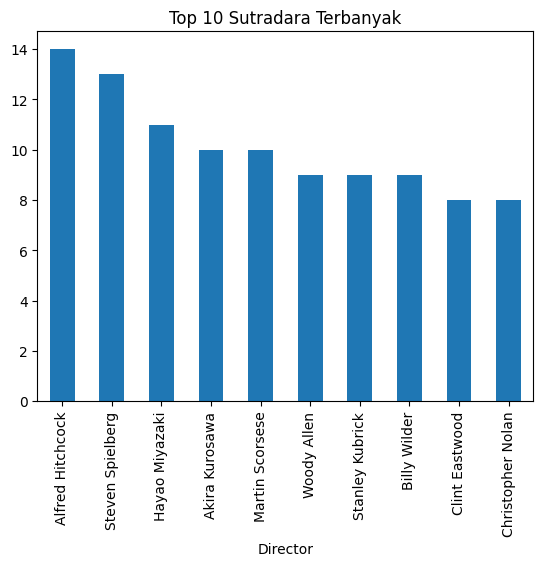

In [ ]:
df['Director'].value_counts().head(10).plot(kind='bar', title='Top 10 Sutradara Terbanyak')

In [3]:
top_gross = df[['Series_Title', 'Gross']].sort_values(by='Gross', ascending=False).head(10)
print(top_gross)

                                   Series_Title        Gross
477  Star Wars: Episode VII - The Force Awakens  936662225.0
59                            Avengers: Endgame  858373000.0
623                                      Avatar  760507625.0
60                       Avengers: Infinity War  678815482.0
652                                     Titanic  659325379.0
357                                The Avengers  623279547.0
891                               Incredibles 2  608581744.0
2                               The Dark Knight  534858444.0
582                                   Rogue One  532177324.0
63                        The Dark Knight Rises  448139099.0
